In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import r2_score,mean_absolute_error

In [2]:
data=pd.read_csv(r"E:\data trained projects\abalone.csv")

In [3]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [6]:
le=LabelEncoder()

In [7]:
data['Sex']=le.fit_transform(data[['Sex']])

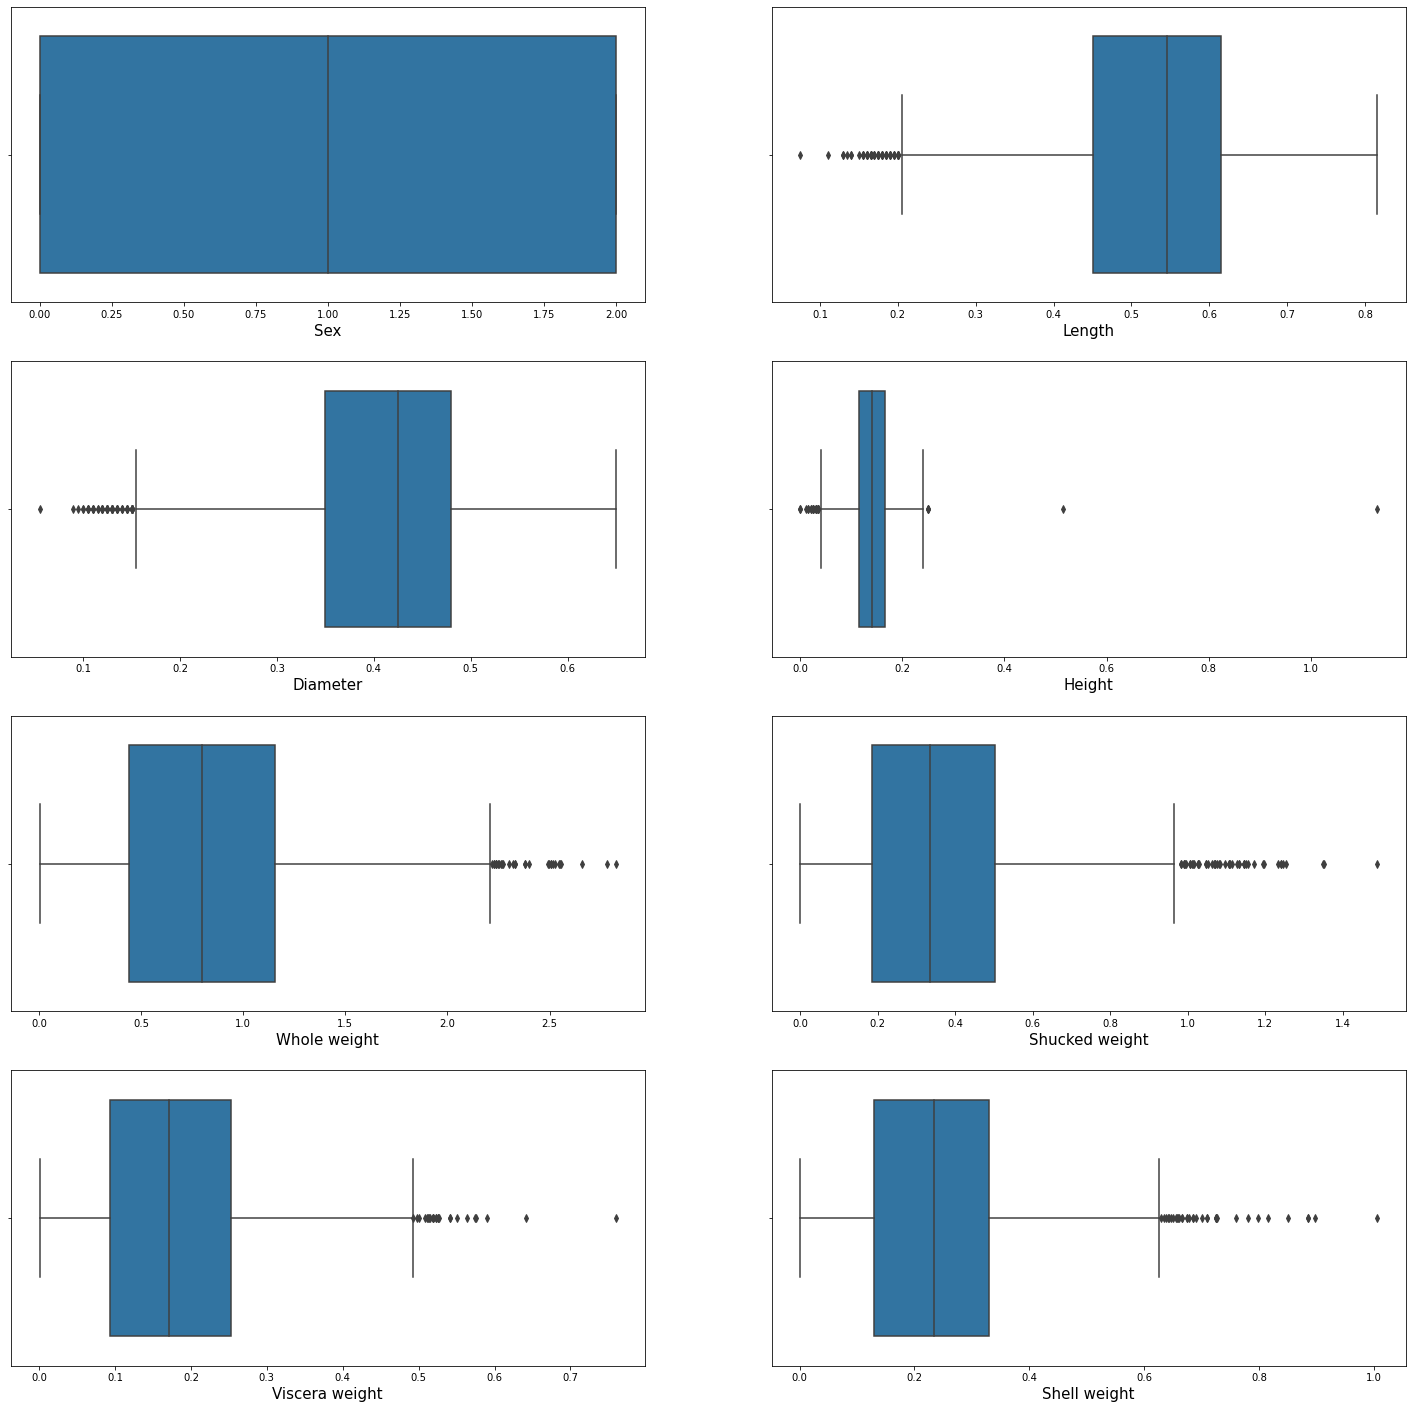

In [8]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [9]:
data.shape

(4177, 9)

In [10]:
from scipy.stats import zscore
z_score=zscore(data[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score < 2).all(axis=1)

data=data[filtering_entry]
data.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000,3707.000000
mean,1.048557,0.525997,0.409405,0.138978,0.792120,0.343091,0.172752,0.228999,9.963852
std,0.824814,0.097634,0.081492,0.031871,0.396871,0.179276,0.089901,0.112436,2.963401
min,0.000000,0.285000,0.210000,0.060000,0.093500,0.031000,0.015000,0.027000,4.000000
25%,0.000000,0.460000,0.352500,0.115000,0.461750,0.195500,0.099000,0.135000,8.000000
50%,1.000000,0.540000,0.420000,0.140000,0.784000,0.329000,0.167000,0.228000,9.000000
75%,2.000000,0.605000,0.475000,0.165000,1.101500,0.480000,0.239000,0.310500,11.000000
max,2.000000,0.730000,0.590000,0.220000,1.808500,0.802000,0.399000,0.516500,29.000000


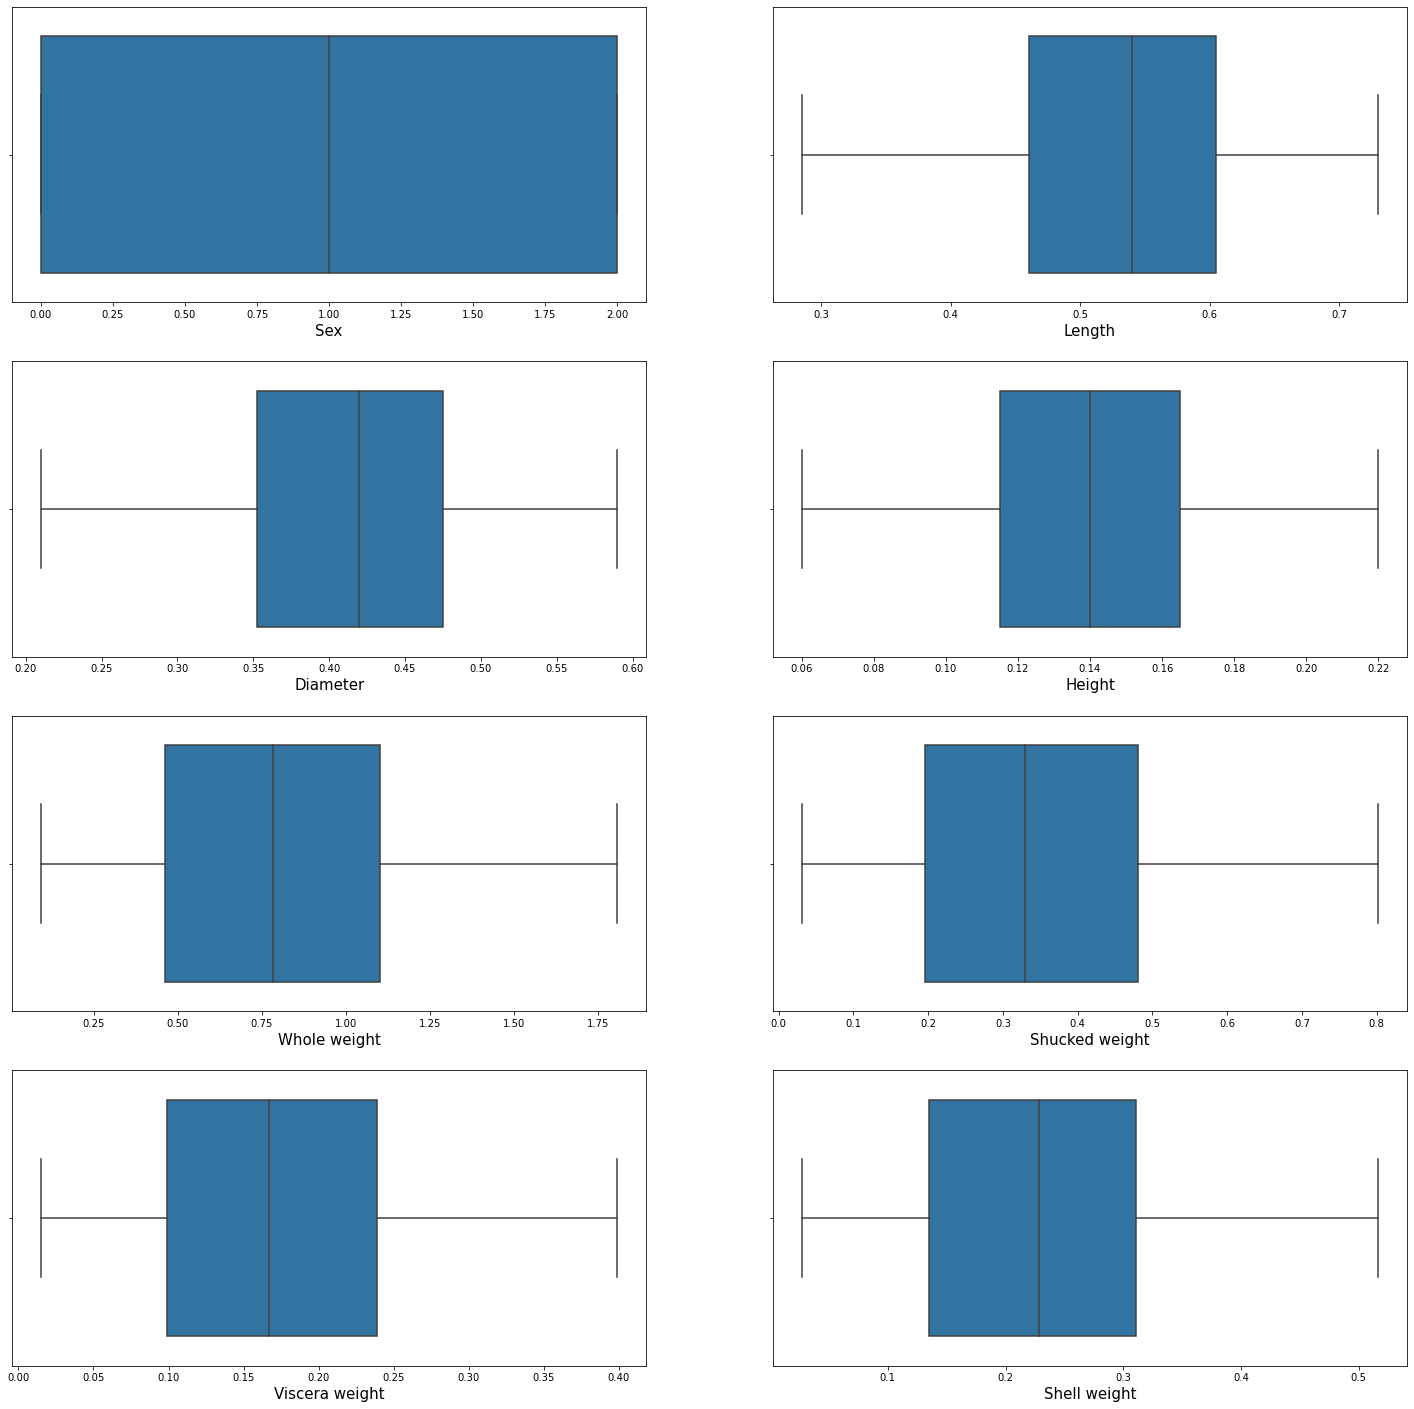

In [11]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [12]:
data.shape

(3707, 9)

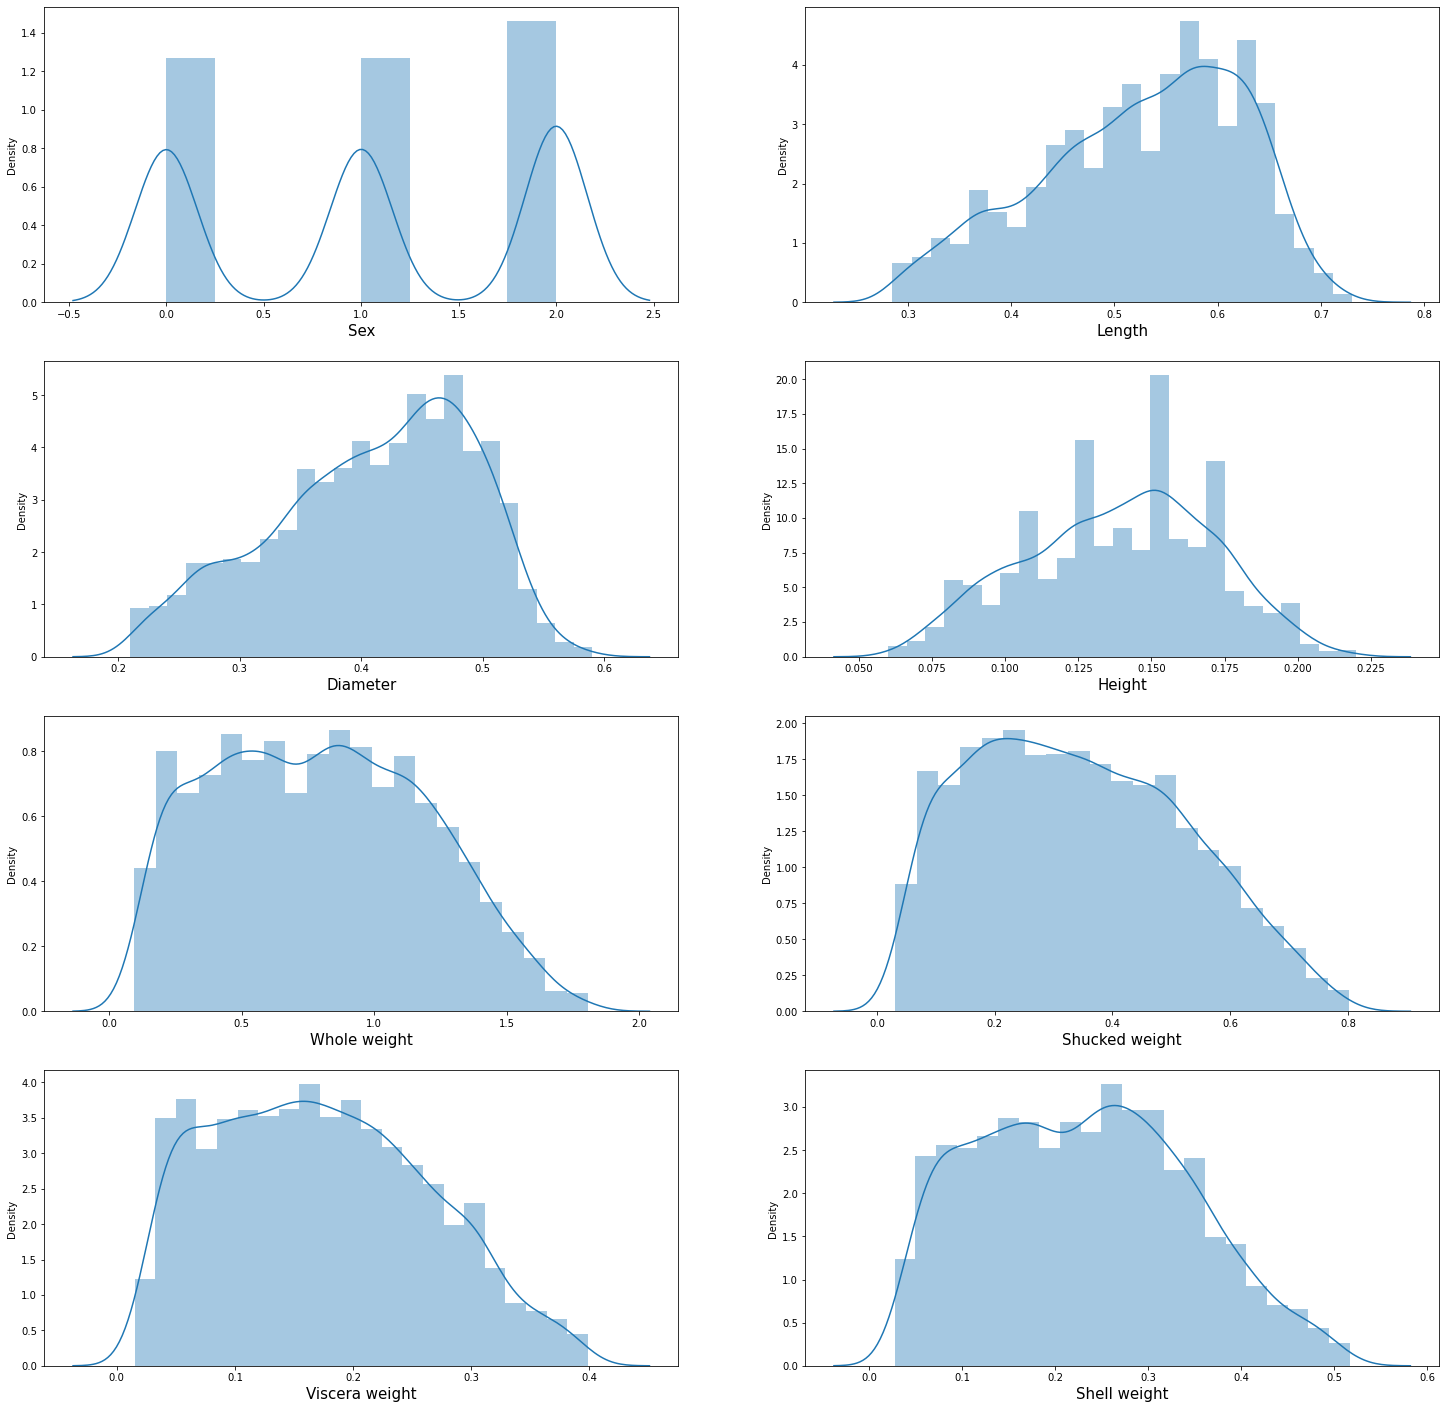

In [13]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [14]:
x=data.drop(labels=['Rings'],axis=1)
y=data['Rings']

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler=StandardScaler()

In [17]:
scaled=scaler.fit_transform(x)

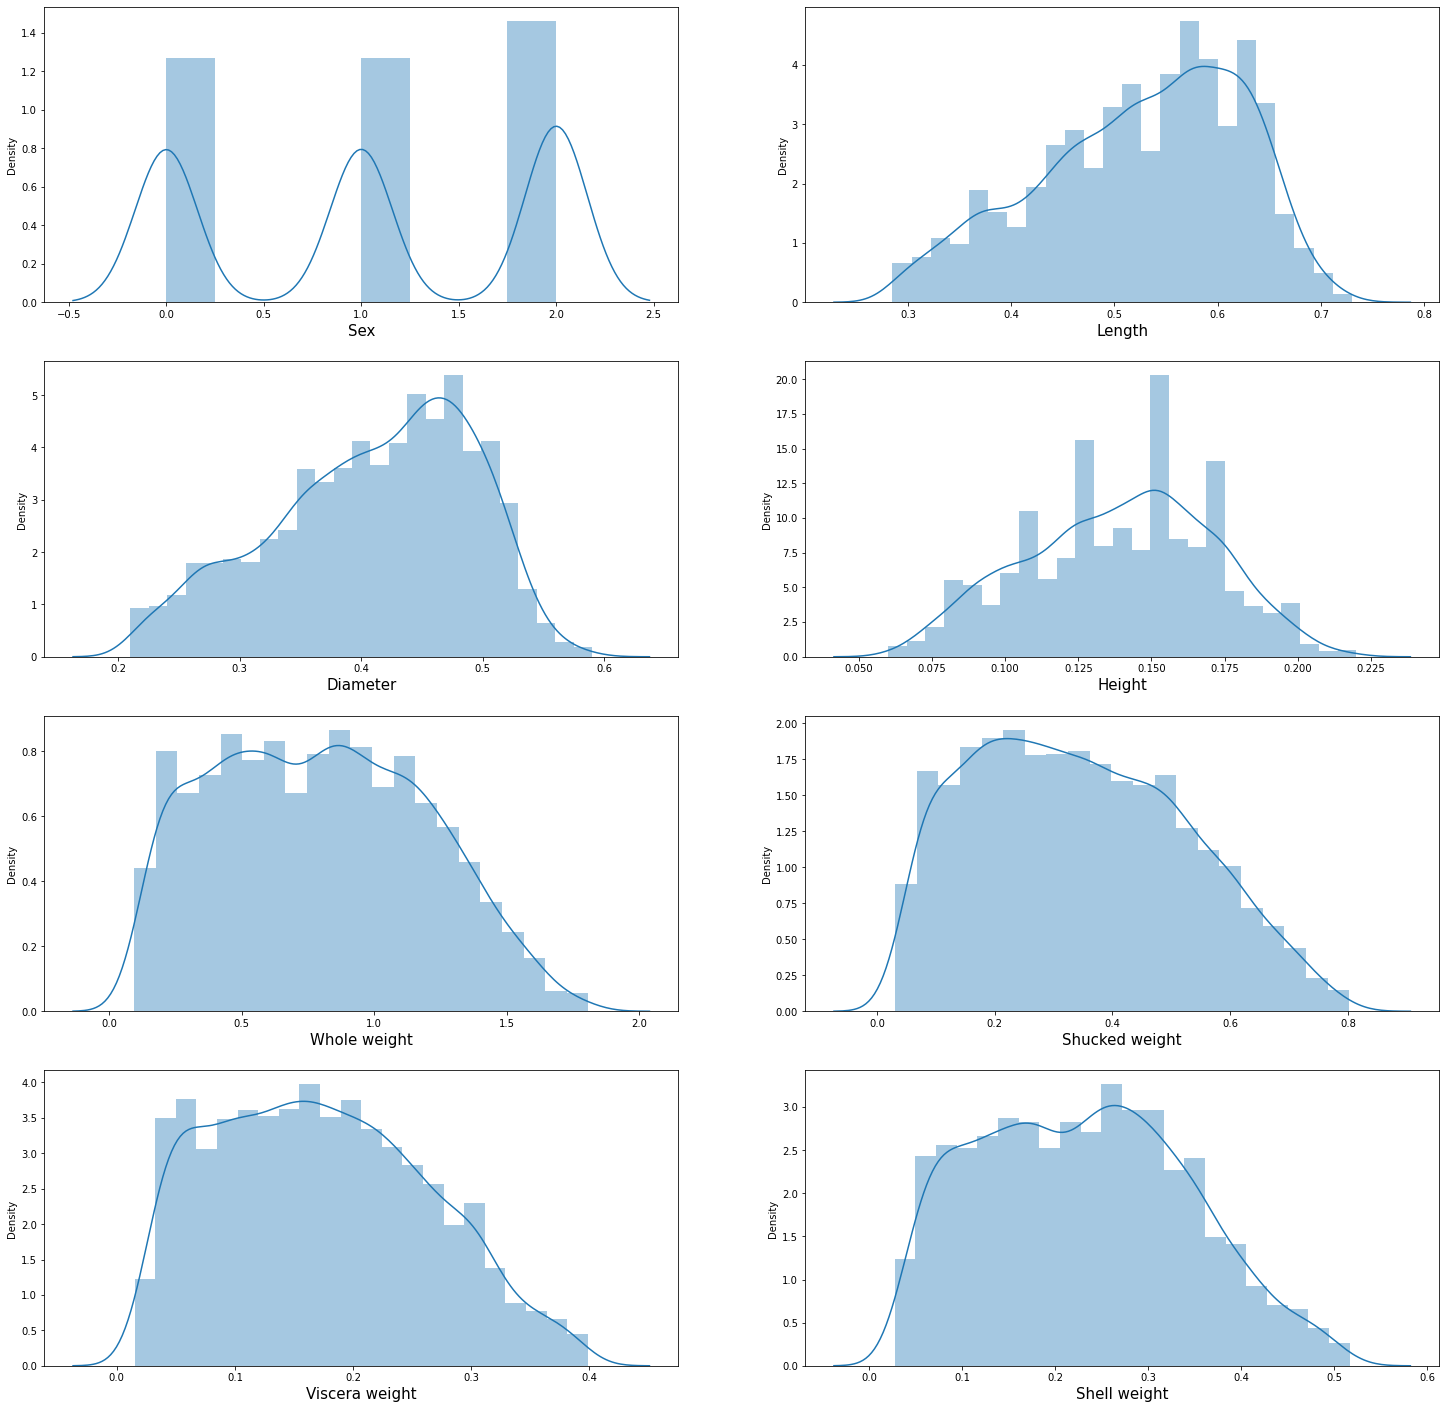

In [18]:
plt.figure(figsize=(25,25))
graph=1
for column in data:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

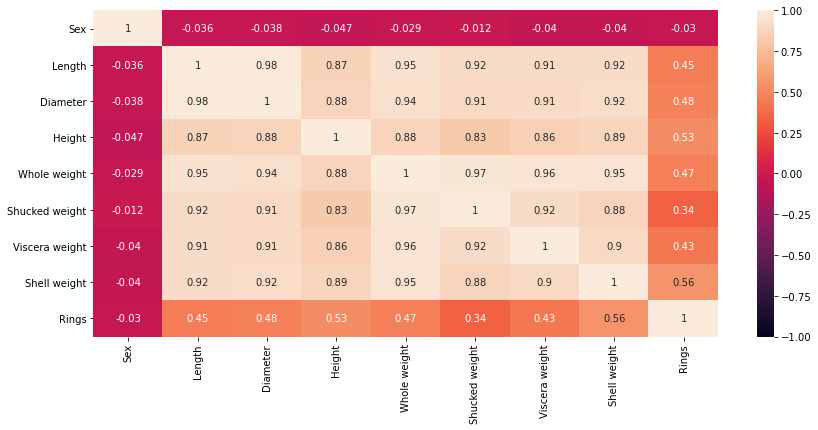

In [19]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [20]:
 x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.30,random_state=55)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [22]:
lr=LinearRegression()

In [23]:
dt=DecisionTreeRegressor()

In [24]:
rf=RandomForestRegressor()

In [25]:
knn=KNeighborsRegressor()

In [26]:
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [30]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [31]:
lr_pred=lr.predict(x_test)

In [32]:
dt_pred=dt.predict(x_test)

In [35]:
rf_pred=rf.predict(x_test)

In [36]:
knn_pred=knn.predict(x_test)

In [38]:
mean_absolute_error(y_test,lr_pred)

1.593801093796648

In [39]:
mean_absolute_error(y_test,dt_pred)

2.018867924528302

In [40]:
mean_absolute_error(y_test,rf_pred)

1.5398382749326145

In [41]:
mean_absolute_error(y_test,knn_pred)

1.6226415094339623

In [49]:
lin_score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_absolute_error')
lr_score_n=-lin_score
np.mean(lr_score_n)

1.6432524215151427

In [50]:
lin_score=cross_val_score(dt,x,y,cv=5,scoring='neg_mean_absolute_error')
dt_score_n=-lin_score
np.mean(dt_score_n)

2.0954188810196754

In [51]:
lin_score=cross_val_score(rf,x,y,cv=5,scoring='neg_mean_absolute_error')
rf_score_n=-lin_score
np.mean(rf_score_n)

1.608020799458734

In [52]:
lin_score=cross_val_score(knn,x,y,cv=5,scoring='neg_mean_absolute_error')
knn_score_n=-lin_score
np.mean(knn_score_n)

1.6319490307772333

In [ ]:
#min difference between mean_absolute_error and cross validation score is of knn model i.e is of 0.01. hence,knn is the best model.